In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("incl/")


import narrom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
trajectories = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# trajectories = trajectories[::10]

for k in range(len(trajectories)):
    trajectories[k] = trajectories[k].T

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


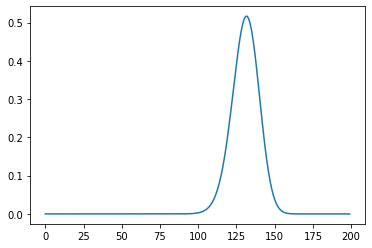

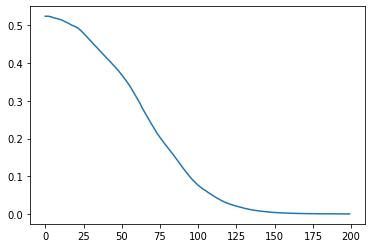

In [5]:
plt.plot(trajectories[1][0])
plt.show()

plt.plot(trajectories[1][-1])
plt.show()

In [12]:
#// Numerische Berechnung von chem-Pot und Temperatur der Verteilungen aus tatsächlicher Dichte

STEP_LIMIT = 200  #// maximale Anzahl an Schritten für eine Berechnung
dmu = 0.5E-3        #// differentieller Schritt zur Berechnung der Ableitungen d/dmu,d/dT
dT = 1
mstep_max = 0.05  #// maximale Schrittweite der Iterationen
Tstep_max = 25


# // berechnet chem Pot. (eV) und Temperatur der Fermiverteilung
# // aus vorgegebener Ladungsträgerdichte + Gesamtenergie, Ausgabe in *mu, *temp
# // en_Bulk/QW/QD sind entweder Elektonen- oder Loch-Energien (werden durch Aufruf der jeweiligen calc_fermi_CP_e/h-Funktion gesetzt)
def calc_fermi(state, mu_start, T_start):
    m=mu_start
    T=T_start;

    m2 = m;
    T2 = T;
#     steps = 0;
    d = 0
    d_dmu = 0
    d_dT = 0
    dDdmu = 0
    dDdT = 0;
    E = 0
    E_dmu = 0
    E_dT = 0
    dEdmu = 0
    dEdT = 0;
    f=0
    mstep=0
    Tstep=0

    Jacobi_Det = 0;
    deltaD = 0
    deltaE = 0
    for steps in range(STEP_LIMIT):
        d = d_dmu = d_dT = 0
        E = E_dmu = E_dT = 0
        #// resultierende Dichte + Energie aus Fermifunktion aufsummieren
        #// m2 = m+delta_m,
        #// Berechnung der Jacobi-Matrix von (Dichte, Energie) nach (mu, T)
        m2 = m+dmu
        T2 = T+dT
#         for( int i=0; i<KSAMPLES; i++) {
#             // Gesamtdichte und -energie aufsummieren
#             f = DOS_Bulk[i] * fermi(en_Bulk[i], m, T);
#             d += f;        E += f * en_Bulk[i];

#             // Werte bei mu = mu+dmu
#             f = DOS_Bulk[i] * fermi(en_Bulk[i], m2, T);
#             d_dmu += f;        E_dmu += f * en_Bulk[i];

#             // Werte bei T = T+dT
#             f = DOS_Bulk[i] * fermi(en_Bulk[i], m, T2);
#             d_dT += f;        E_dT += f * en_Bulk[i];
#         }
#         // Genau genug -> fertig
#         double error = max( fabs(d/dens-1), fabs(E/en-1) );
#         if( error <= MAXERROR ) break;

#         //Jacobi-Matrix-Elemente berechnen
#         dDdmu = (d_dmu-d)/dmu;
#         dEdmu = (E_dmu-E)/dmu;
#         dDdT = (d_dT-d)/dT;
#         dEdT = (E_dT-E)/dT;
#         Jacobi_Det = dDdT*dEdmu-dDdmu*dEdT;
#         if (Jacobi_Det == 0) {
#             cout << "calc_fermi_CC_eh: Jacobi_Det wird null!!!" << endl;
#             cout << "     d="<<d<<"  mu="<<m<<"  E="<<E<<"  T="<<T<<endl;
#             exit(0);
#         }
#         // Berechne neues mu,T durch Lösung von A.(deltaMu, deltaT) = (deltaD, deltaE). => Invertierung der Jacobimatrix gibt dmu,dT
#         deltaD = dens-d;
#         deltaE = en-E;
#         mstep = (deltaE*dDdT-deltaD*dEdT)/Jacobi_Det;
#         Tstep = (deltaD*dEdmu-deltaE*dDdmu)/Jacobi_Det;

#         if(mstep < -mstep_max) mstep = -mstep_max;
#         else if (mstep > mstep_max) mstep = mstep_max;
#         if(Tstep < -Tstep_max) Tstep = -Tstep_max;
#         else if (Tstep > Tstep_max) Tstep = Tstep_max;

#         m += mstep;
#         T += Tstep;

#         steps++;
#         if(steps>STEP_LIMIT) {
#             cout << "calc_fermi_CC_eh braucht mehr als STEP_LIMIT Schritte!" << endl;
#             cout << "calc_fermi_CC_eh: mu_start=" << mu_start << ",T_start=" << T_start <<endl;
#             cout << "calc_fermi_CC_eh: dens=" << dens << ", en=" << en <<endl;
#             cout << "calc_fermi_CC_eh: d=" << d << ", E=" << E <<endl;
#             cout << "calc_fermi_CC_eh: mu=" << m << ", T=" << T << endl;
#             cout << "calc_fermi_CC_eh: error=" << error << " nach " << steps << " Schritten" << endl;

#             exit(0);
# #         }

#     } while(1);